### Distribution of posts on 09/11/2017

In [119]:
import pandas as pd
import numpy as np
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
from ast import literal_eval
from user_agents import parse
from collections import Counter
import datetime

### Set the path and import data

In [120]:
CURR_PATH = getcwd()
# # The above command will give us the current working directory.
PATH_DATA = CURR_PATH + "/data/new/"

# # accounts_data = pd.read_csv(PATH_DATA + "instagram_accounts.csv",converters={'id_followers': literal_eval, 'department': literal_eval})
# posts_data = pd.read_csv(PATH_DATA + "instagram_posts.csv")
# posts_data_2 = pd.read_csv(PATH_DATA + "instagram_posts_1211_1611.csv")

In [121]:
accounts_data = pd.read_csv(PATH_DATA + "instagram_accounts.csv", converters={'id_followers': literal_eval, 'department': literal_eval})
posts_data = pd.read_csv(PATH_DATA + "instagram_posts.csv")
posts_data1 = posts_data.head(1193)
posts_data_2 = posts_data[1194:]

### First Visualiation of the data

In [122]:
print(posts_data.head())

   Unnamed: 0  Unnamed: 0.1  id_user    id_post        date   time half_day  \
0           0             0   672702  638779430  09/11/2017  07:53       am   
1           1             1   474227  953043456  09/11/2017  02:03       am   
2           2             2   587566  650889385  09/11/2017  02:57       am   
3           3             3   483543  144265898  09/11/2017  11:43       am   
4           4             4   394103  955542283  09/11/2017  04:53       pm   

   views  reposts  likes  comments  id_post_origin  link_clicks  donation_tag  \
0      2       18      0         0               0         True         False   
1     36       11     16         1               0         True         False   
2     59       11      8         1               0         True         False   
3     21       14      9         2               0         True         False   
4     16        3      2         0       638779430        False         False   

   donation_val  house_buy            

### Number of posts each day


09/11/2017 --> Thursday
10/11/2017 --> Friday
11/11/2017 --> Saturday
12/11/2017 --> Sunday
13/11/2017 --> Monday
14/11/2017 --> Tuesday
15/11/2017 --> Wednesday
16/11/2017 --> Thursday
11/11/2017    939
12/11/2017    783
13/11/2017    497
14/11/2017    313
10/11/2017    222
15/11/2017    197
16/11/2017     62
09/11/2017     32
Name: date, dtype: int64


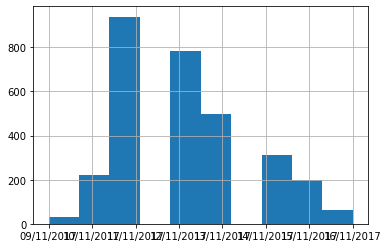

In [123]:
num_dates = posts_data['date'].value_counts()
num_dates_2 = posts_data_2['date'].value_counts()
print("09/11/2017 --> Thursday")
print("10/11/2017 --> Friday")
print("11/11/2017 --> Saturday")
print("12/11/2017 --> Sunday")
print("13/11/2017 --> Monday")
print("14/11/2017 --> Tuesday")
print("15/11/2017 --> Wednesday")
print("16/11/2017 --> Thursday")


print(num_dates)
posts_data['date'].hist()
# print(num_dates_2)
# posts_data_2['date'].hist()


### Distribution of posts throughtout the day!

(09/11 - 16/11)

09/11/2017


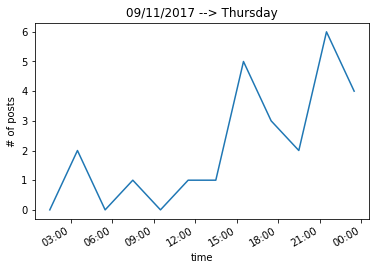

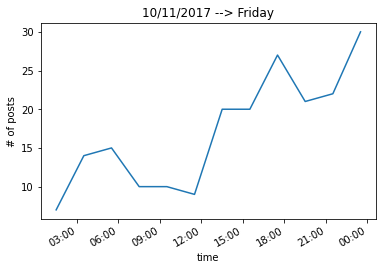

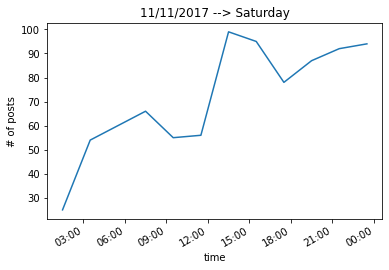

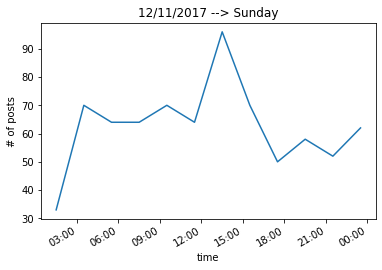

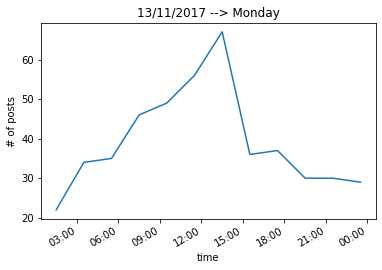

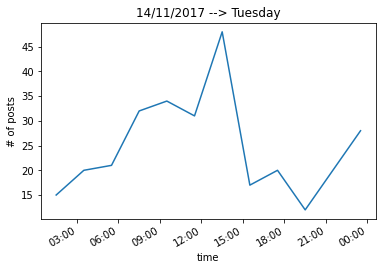

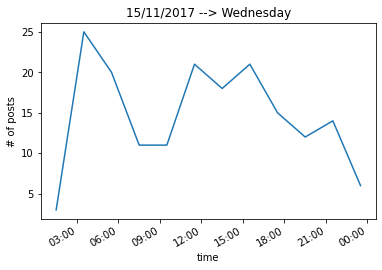

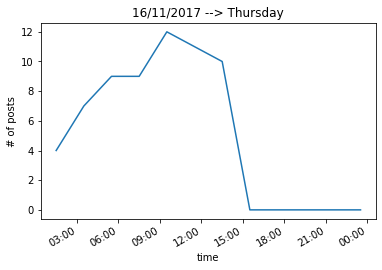

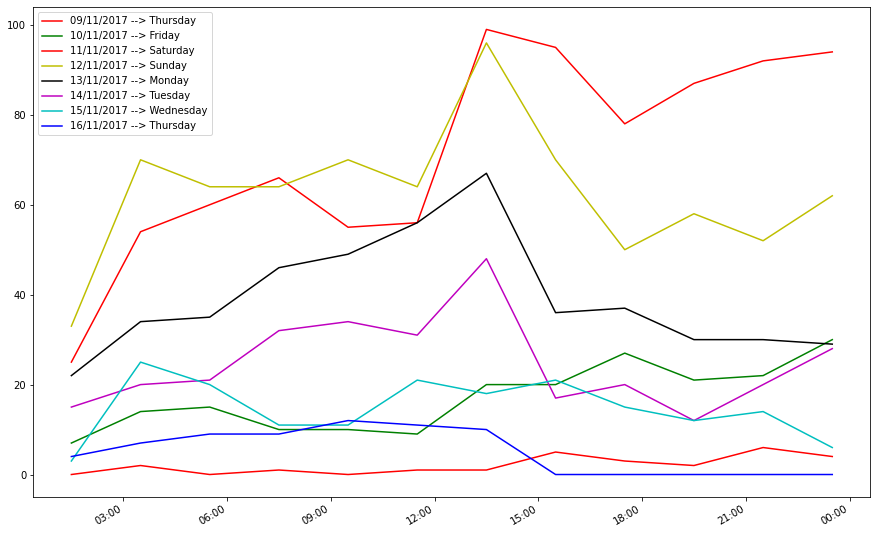

In [124]:
date_p = posts_data['date'].to_frame()
date_p_2 = posts_data_2['date'].to_frame()
print(date_p.values[1,0])

ls_index_09 = []
ls_index_10 = []
ls_index_11 = []
ls_index_12 = []
ls_index_13 = []
ls_index_14 = []
ls_index_15 = []
ls_index_16 = []

for i in range(len(date_p)):
    if date_p.values[i,0][0:2] == "09":
        ls_index_09.append(i)
    if date_p.values[i,0][0:2] == "10":
        ls_index_10.append(i)
    if date_p.values[i,0][0:2] == "11":
        ls_index_11.append(i)

for j in range(len(date_p_2)):
    if date_p_2.values[j,0][0:2] == "12":
        ls_index_12.append(j)
    if date_p_2.values[j,0][0:2] == "13":
        ls_index_13.append(j)
    if date_p_2.values[j,0][0:2] == "14":
        ls_index_14.append(j)
    if date_p_2.values[j,0][0:2] == "15":
        ls_index_15.append(j)
    if date_p_2.values[j,0][0:2] == "16":
        ls_index_16.append(j)


time_p = posts_data['time'].to_frame()
time_half_day = posts_data['half_day'].to_frame()
time_p_2 = posts_data_2['time'].to_frame()
time_half_day_2 = posts_data_2['half_day'].to_frame()



#print(time_p.values[100,0])
#print(int(time_p.values[100,0][0:2]))
#print(int(time_p.values[100,0][-2::]))

time_interv = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]

y = []
ls_index_dates = [ls_index_09 ,ls_index_10, ls_index_11, ls_index_12, ls_index_13, ls_index_14, ls_index_15, ls_index_16]
date_str = ["09/11/2017 --> Thursday", "10/11/2017 --> Friday", "11/11/2017 --> Saturday", "12/11/2017 --> Sunday", "13/11/2017 --> Monday",
"14/11/2017 --> Tuesday", "15/11/2017 --> Wednesday", "16/11/2017 --> Thursday"]
num = 0

for ls_index in ls_index_dates:

    num_of_posts_02 = 0
    num_of_posts_24 = 0
    num_of_posts_46 = 0
    num_of_posts_68 = 0
    num_of_posts_810 = 0
    num_of_posts_1012= 0
    num_of_posts_1214 = 0
    num_of_posts_1416 = 0
    num_of_posts_1618 = 0
    num_of_posts_1820 = 0
    num_of_posts_2022 = 0
    num_of_posts_2224 = 0

    for i in ls_index:
        if num <= 2:
            if time_half_day.values[i,0] == 'am':
                min = int(time_p.values[i,0][-2::])
                hour = int(time_p.values[i,0][0:2]) + (min / 60)
            elif time_half_day.values[i,0] == 'pm':
                min = int(time_p.values[i,0][-2::])
                hour = int(time_p.values[i,0][0:2]) + (min / 60) + 12
        elif num > 2:
            if time_half_day_2.values[i,0] == 'am':
                min = int(time_p_2.values[i,0][-2::])
                hour = int(time_p_2.values[i,0][0:2]) + (min / 60)
            elif time_half_day_2.values[i,0] == 'pm':
                min = int(time_p_2.values[i,0][-2::])
                hour = int(time_p_2.values[i,0][0:2]) + (min / 60) + 12

        # ls_time_09.append(datetime.datetime(2017, 11, 9, hour, min, 0))
        if 0 <= hour and hour <= 2:
            num_of_posts_02 += 1
        elif 2 < hour and hour <= 4:
            num_of_posts_24 += 1
        elif 4 < hour and hour <= 6:
            num_of_posts_46 += 1
        elif 6 < hour and hour <= 8:
            num_of_posts_68 += 1
        elif 8 < hour and hour <= 10:
            num_of_posts_810 += 1
        elif 10 < hour and hour <= 12:
            num_of_posts_1012 += 1
        elif 12 < hour and hour <= 14:
            num_of_posts_1214 += 1
        elif 14 < hour and hour <= 16:
            num_of_posts_1416 += 1
        elif 16 < hour and hour <= 18:
            num_of_posts_1618 += 1
        elif 18 < hour and hour <= 20:
            num_of_posts_1820 += 1
        elif 20 < hour and hour <= 22:
            num_of_posts_2022 += 1
        elif 22 <  hour and hour <= 24:
            num_of_posts_2224 += 1

    y.append([num_of_posts_02, num_of_posts_24, num_of_posts_46, num_of_posts_68, num_of_posts_810, num_of_posts_1012, 
        num_of_posts_1214, num_of_posts_1416, num_of_posts_1618, num_of_posts_1820, num_of_posts_2022, num_of_posts_2224])
    
    num += 1
    
    

x = [datetime.datetime(2021, 1, 1, i, 30, 0) for i in time_interv]

for i in range(len(ls_index_dates)):
    # plot
    plt.plot(x, y[i])
    # beautify the x-labels
    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter('%H:%M')
    plt.gca().xaxis.set_major_formatter(myFmt)
    # labels
    plt.title(date_str[i])
    plt.xlabel("time")
    plt.ylabel("# of posts")
    plt.show()

plt.figure(figsize=(15,10))
plt.plot(x, y[0], color='r', label= date_str[0])
plt.plot(x, y[1], color='g', label= date_str[1])
plt.plot(x, y[2], color='r', label= date_str[2])
plt.plot(x, y[3], color='y', label= date_str[3])
plt.plot(x, y[4], color='k', label= date_str[4])
plt.plot(x, y[5], color='m', label= date_str[5])
plt.plot(x, y[6], color='c', label= date_str[6])
plt.plot(x, y[7], color='b', label= date_str[7])
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.legend()
    
# Combine all the operations and display
plt.show()